## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### ANÁLISIS ESPECTRAL

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace import sarimax
from scripts.import_data import data

#### Importo datos procesados en otras notebooks

In [5]:
molinetes, rolling_median, difference = data()

#### Hago el análisis espectral para verificar las componentes cíclicas que tiene mi serie

In [6]:
from scipy import signal

In [7]:
molinetes.tail()

,total
fecha,
2019-12-27,1080310.0
2019-12-28,408094.0
2019-12-29,213081.0
2019-12-30,865096.0
2019-12-31,307615.0


In [19]:
# Mi dataset tiene 3 años de datos (1092 muestras), para hacer el periodograma tomo 365
molinetes_sampled = molinetes.iloc[365:730]
molinetes_sampled.head(), molinetes_sampled.shape

(               total
 fecha               
 2018-01-01  108483.0
 2018-01-02  898909.0
 2018-01-03  970114.0
 2018-01-04  929510.0
 2018-01-05  950626.0,
 (365, 1))

Text(0.5, 0, 'f')

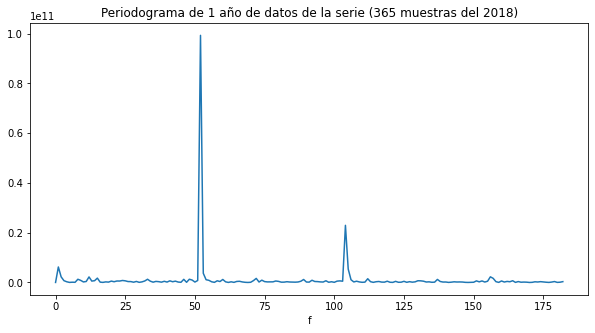

In [18]:
N = 365 # Número de muestras
f, Pxx_den = signal.periodogram(molinetes_sampled.total, N)
plt.figure(figsize=[10,5])
plt.plot(f, Pxx_den)
plt.title('Periodograma de 1 año de datos de la serie (365 muestras del 2018)')
plt.xlabel('f')

#### Cambio la escala de los gráficos para ver mejor las componentes

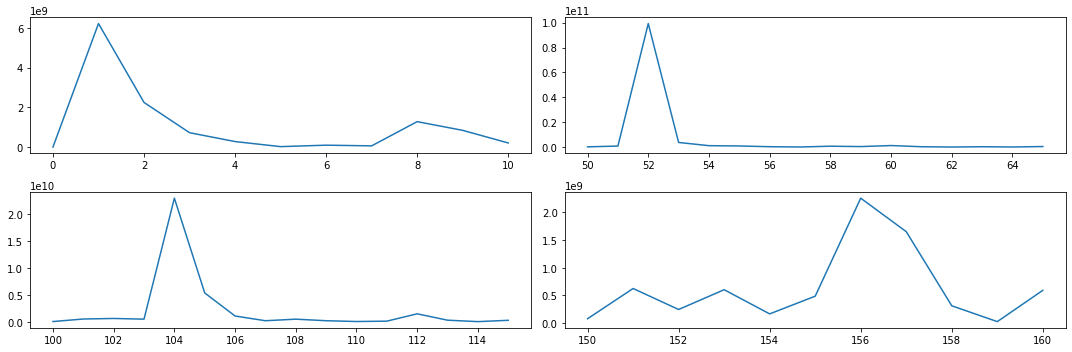

In [10]:
periodogram = pd.DataFrame(f, columns=['freq'])
periodogram['PSD'] = Pxx_den
periodogram.set_index(keys='freq', inplace=True)

fig, ax = plt.subplots(2,2,figsize=(15,5))
ax[0,0].plot(periodogram.PSD[0:10])
#ax[0,1].plot(periodogram.PSD[100:200])
#ax[1,0].plot(periodogram.PSD[310:315])
#ax[1,1].plot(periodogram.PSD[460:475])
ax[0,1].plot(periodogram.PSD[50:65])
ax[1,0].plot(periodogram.PSD[100:115])
ax[1,1].plot(periodogram.PSD[150:160])
plt.tight_layout()

#### Pruebo hacer el Periodograma de la serie suavizada con mediana móvil y k=30, tomando 1 año de datos

In [20]:
# Tomo los datos de la serie suavizada
smoothed = pd.DataFrame(rolling_median.result_30.iloc[30:])


In [21]:
# Me quedo con 1 año exacto de datos
smoothed_sampled = smoothed.iloc[335:700]
smoothed_sampled.tail()

,result_30
fecha,
2018-12-27,1181250.5
2018-12-28,1135772.5
2018-12-29,1135772.5
2018-12-30,1135772.5
2018-12-31,1135772.5


Text(0.5, 0, 'f')

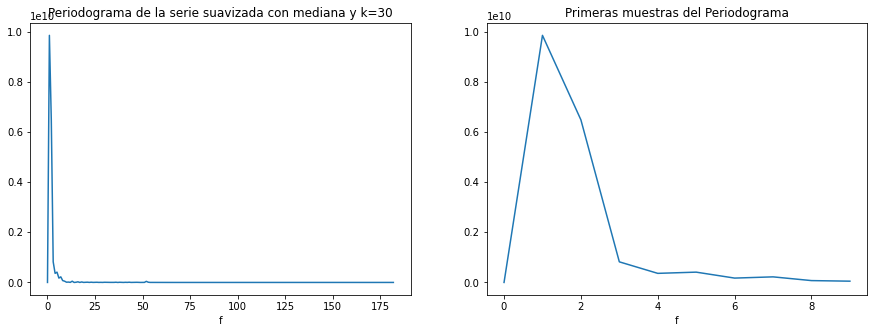

In [34]:
f2, Pxx_den_2 = signal.periodogram(smoothed_sampled.result_30, 365)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Periodograma de la serie suavizada con mediana y k=30')
ax[0].plot(f2, Pxx_den_2)
ax[0].set_xlabel('f')
ax[1].set_title('Primeras muestras del Periodograma')
ax[1].plot(f2[0:10], Pxx_den_2[0:10])
ax[1].set_xlabel('f')
